In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib

In [3]:
%matplotlib inline

In [4]:
matplotlib.rcParams["font.size"] = 16

In [5]:
s = Series([0, 100, 300, 200, 400], index=[0, 1, 20, 21, 22])
s

0       0
1     100
20    300
21    200
22    400
dtype: int64

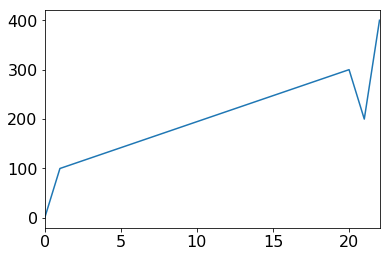

In [6]:
s.plot.line()

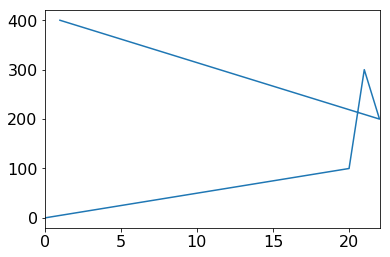

In [7]:
s = Series([0, 100, 300, 200, 400], index=[0, 20, 21, 22, 1])
s.plot.line()

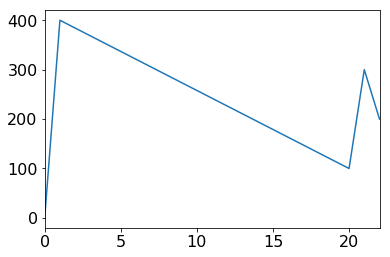

In [8]:
s.sort_index().plot.line()

In [9]:
df = DataFrame({
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]
})
df

,high,low
0,26,11
1,31,15
2,43,25
3,57,36
4,68,46
5,78,56
6,82,61
7,79,59
8,72,50
9,59,39


Text(0, 0.5, 'Temp (Fehrenheit)')

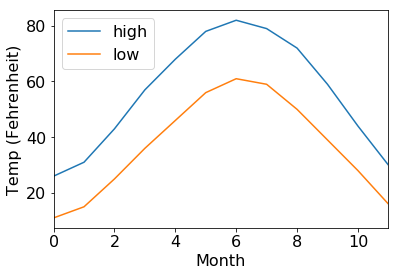

In [10]:
ax = df.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")

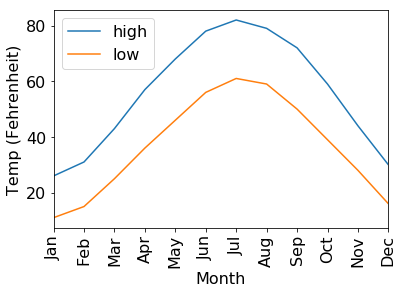

In [11]:
ax = df.plot.line() # OPT 1: make it wider with figsize
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
ax.set_xticks(range(12))
None

In [12]:
celcius = (df - 32) / (212-32) * 100
celcius.head()

,high,low
0,-3.333333,-11.666667
1,-0.555556,-9.444444
2,6.111111,-3.888889
3,13.888889,2.222222
4,20.000000,7.777778


In [13]:
celcius["freezing"] = 0
celcius

,high,low,freezing
0,-3.333333,-11.666667,0
1,-0.555556,-9.444444,0
2,6.111111,-3.888889,0
3,13.888889,2.222222,0
4,20.000000,7.777778,0
5,25.555556,13.333333,0
6,27.777778,16.111111,0
7,26.111111,15.000000,0
8,22.222222,10.000000,0
9,15.000000,3.888889,0


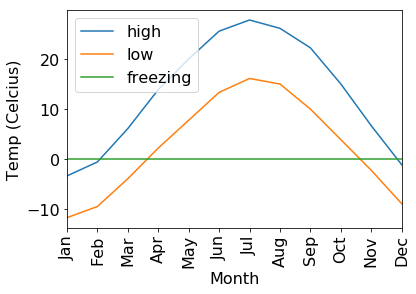

In [14]:
ax = celcius.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Celcius)")
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
ax.set_xticks(range(12))
None

# Stock Market Example

In [15]:
df = pd.read_csv("sp500.csv")
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


In [16]:
starting = 1000
df["tot"] = df["return"].cumprod()
df["wealth"] = df["tot"] * starting
df.set_index("year").tail()

,return,tot,wealth
year,,,
2014,1.1369,88.439335,88439.334579
2015,1.0138,89.659797,89659.797397
2016,1.1196,100.383109,100383.109165
2017,1.2183,122.296742,122296.741896
2018,0.9557,116.878996,116878.996230


Text(0, 0.5, 'Wealth ($)')

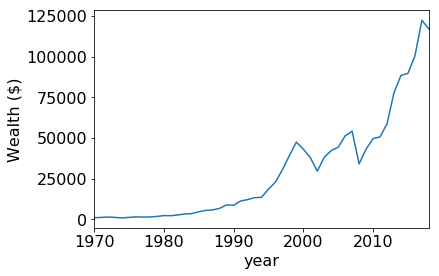

In [17]:
ax = df.set_index("year")["wealth"].plot.line()
ax.set_ylabel("Wealth ($)")

In [18]:
# how risk is investing in SP500 index going forward
# approach:
# 1. run sim, randomly replaying past years
# 2. run hundreds of sims, explore range of outcomes

In [19]:
import random

In [20]:
random.choice([3, 4, 9])

4

In [21]:
random.choices([3, 4, 9], k=10)

[9, 4, 3, 3, 4, 9, 4, 4, 9, 4]

In [22]:
def run_sim(years=10, starting=1000):
    rand_returns = random.choices(df["return"], k=years)
    rand_returns = Series(rand_returns)
    return rand_returns.cumprod() * starting

def run_n_sims(n, years=10, starting=1000):
    sims = pd.DataFrame()
    for i in range(n):
        sims["sim"+str(i)] = run_sim(years=years, starting=starting)
    return sims

sims = run_n_sims(250)
sims.tail()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim240,sim241,sim242,sim243,sim244,sim245,sim246,sim247,sim248,sim249
5,3199.150033,2279.951268,1064.967630,1137.854855,2604.414624,1450.546756,2562.874682,3345.748395,3721.393782,770.187047,...,1901.863596,1319.923180,2211.972891,2325.623444,1654.038874,2436.475757,3012.606117,2057.425017,3056.931996,1138.120943
6,3920.878281,3040.543012,1146.118163,1197.592235,3397.979759,1796.357102,2449.339334,4407.354361,3278.920061,599.975710,...,1941.992918,1604.366625,2113.982492,2880.052073,1580.764952,3209.569515,3210.233079,2601.819677,2962.167104,1383.386006
7,3054.364181,3909.530204,1495.340367,1318.309532,4369.122375,2174.310636,2635.978991,4638.740465,4318.009829,772.048743,...,2153.281748,1845.984238,2230.040131,3566.656487,1614.119093,3385.774881,2828.536366,2292.463317,3156.485266,1488.800019
8,4043.672739,4303.610849,1573.845737,1595.681858,5789.087146,2434.358188,3472.375124,4087.194224,4184.151524,809.956336,...,2770.842953,1871.458821,2586.846552,4653.416719,2126.279081,4417.420488,3014.088351,3037.513896,2781.179168,1415.551058
9,4099.475422,5920.907806,1867.682736,2081.886120,4509.698887,2883.253838,4120.667560,4766.077184,4502.983870,959.312285,...,3801.596531,2279.998282,2749.041831,5159.708458,2380.582059,5346.845758,3878.528890,4167.469065,3179.165907,1820.115551


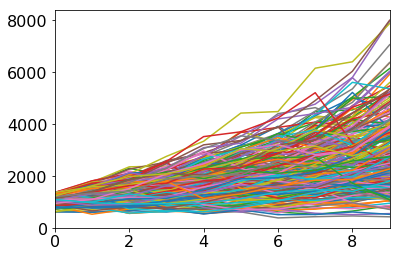

In [23]:
# DS = detective + teacher

# THIS ONE IS THE DETECTIVE VERSION
sims.plot.line(legend=False)

In [24]:
sims

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim240,sim241,sim242,sim243,sim244,sim245,sim246,sim247,sim248,sim249
0,1184.400000,1372.000000,1225.600000,909.000000,1323.900000,853.400000,955.700000,1325.000000,1143.100000,853.400000,...,779.000000,1316.900000,1157.900000,1166.100000,1040.100000,1160.000000,955.700000,1215.500000,1238.400000,1108.800000
1,1439.638200,1444.030000,1242.513280,1149.521400,1612.907370,865.176920,1183.538880,1408.077500,1514.607500,1045.927040,...,922.647600,1527.604000,1401.522160,1381.128840,887.621340,1404.064000,1108.612000,1347.746400,1630.848960,976.963680
2,1611.818929,1601.140464,1129.444572,845.243085,1997.424487,803.057217,1261.179031,1675.330609,1721.957267,1114.539854,...,1134.487489,1559.836444,1869.069953,1638.985594,923.214956,1858.840330,1525.228390,1421.737677,1986.863288,933.684189
3,1981.892555,1522.364353,963.867997,1068.894406,2317.012405,884.005385,1645.460281,2118.623089,2048.784756,1065.165738,...,1149.462724,1806.134619,2164.196098,1728.965904,1216.151061,2113.315571,2092.613351,1896.029367,2091.173611,946.569031
4,2643.051911,2005.410562,1171.581551,1196.734177,2687.734390,1171.307135,2117.378290,2764.167544,2712.386138,988.686838,...,1479.128633,1137.864810,1906.873182,2277.566785,1390.182278,2047.802788,2478.491252,2014.910408,2377.455278,959.063742
5,3199.150033,2279.951268,1064.967630,1137.854855,2604.414624,1450.546756,2562.874682,3345.748395,3721.393782,770.187047,...,1901.863596,1319.923180,2211.972891,2325.623444,1654.038874,2436.475757,3012.606117,2057.425017,3056.931996,1138.120943
6,3920.878281,3040.543012,1146.118163,1197.592235,3397.979759,1796.357102,2449.339334,4407.354361,3278.920061,599.975710,...,1941.992918,1604.366625,2113.982492,2880.052073,1580.764952,3209.569515,3210.233079,2601.819677,2962.167104,1383.386006
7,3054.364181,3909.530204,1495.340367,1318.309532,4369.122375,2174.310636,2635.978991,4638.740465,4318.009829,772.048743,...,2153.281748,1845.984238,2230.040131,3566.656487,1614.119093,3385.774881,2828.536366,2292.463317,3156.485266,1488.800019
8,4043.672739,4303.610849,1573.845737,1595.681858,5789.087146,2434.358188,3472.375124,4087.194224,4184.151524,809.956336,...,2770.842953,1871.458821,2586.846552,4653.416719,2126.279081,4417.420488,3014.088351,3037.513896,2781.179168,1415.551058
9,4099.475422,5920.907806,1867.682736,2081.886120,4509.698887,2883.253838,4120.667560,4766.077184,4502.983870,959.312285,...,3801.596531,2279.998282,2749.041831,5159.708458,2380.582059,5346.845758,3878.528890,4167.469065,3179.165907,1820.115551


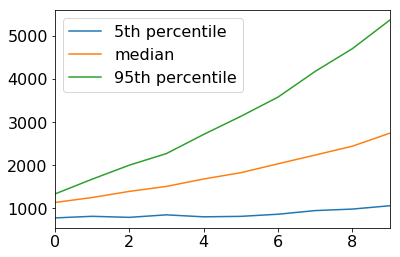

In [25]:
# TEACHER PLOT

# .quantile function gives percentiles
DataFrame({
    "5th percentile": sims.quantile(0.05, axis=1),
    "median": sims.quantile(0.5, axis=1),
    "95th percentile": sims.quantile(0.95, axis=1),
}).plot.line()

# Bar Plot Example w/ Fire Hydrants

In [26]:
df = pd.read_csv("Fire_Hydrants.csv")
df.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

In [27]:
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


In [28]:
orig_colors = df["nozzle_color"]
orig_colors = orig_colors.str.upper()
orig_colors.head(2)

0    BLUE
1    BLUE
Name: nozzle_color, dtype: object

In [29]:
color_counts = orig_colors.value_counts() # in SQL, it's like GROUP BY with COUNT(*)
color_counts.head(3)

BLUE      7003
GREEN      330
ORANGE      79
Name: nozzle_color, dtype: int64

Text(0, 0.5, 'Hydrant Count')

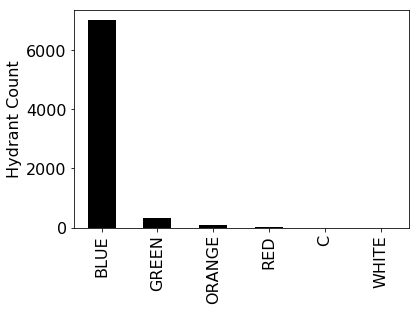

In [30]:
ax = color_counts.plot.bar(color="k")
ax.set_ylabel("Hydrant Count")

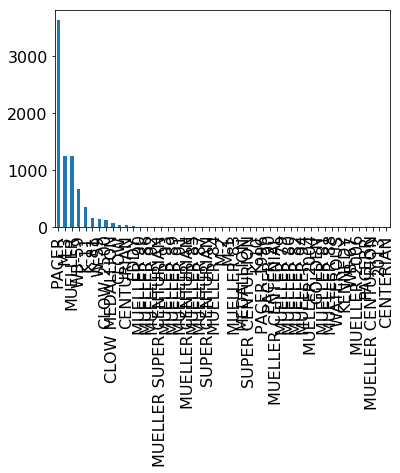

In [31]:
counts = df["Style"].str.upper().value_counts()
counts.plot.bar()

Text(0.5, 0, 'Hydrant Count')

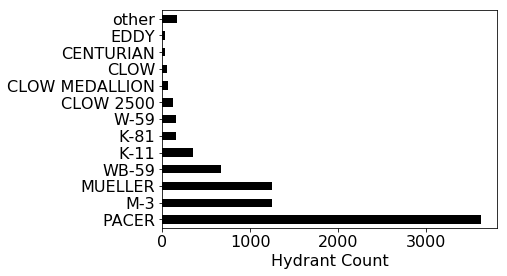

In [32]:
counts = df["Style"].str.upper().value_counts() # GROUP BY, COUNT(*), ORDER BY
top12 = counts.iloc[:12] # we can slice a Series, just like we can a list
top12["other"] = counts.iloc[12:].sum() # insert to Series, like we would w/ a dict
ax = top12.plot.barh(color="k")
ax.set_xlabel("Hydrant Count")

In [33]:
# NEXT: in what decade were pacers manufactured?

In [38]:
df[["Style", "year_manufactured"]].head()

,Style,year_manufactured
0,Pacer,1996.0
1,Pacer,1995.0
2,Pacer,1996.0
3,Pacer,1995.0
4,Pacer,1996.0


In [60]:
pacer_years = df["year_manufactured"][df["Style"] == "Pacer"]
other_years = df["year_manufactured"][df["Style"] != "Pacer"]
pacer_decades = (pacer_years // 10 * 10).dropna().astype(int)
pacer_decades = pacer_decades.value_counts()
other_decades = (other_years // 10 * 10).dropna().astype(int)
other_decades = other_decades.value_counts()

Text(0, 0.5, 'Hydrant Count')

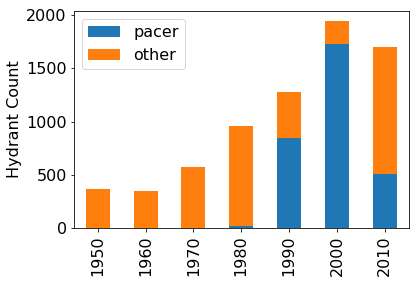

In [68]:
plot_df = DataFrame({
    "pacer": pacer_decades,
    "other": other_decades,
})
plot_df = plot_df[plot_df.index >= 1950]
ax = plot_df.plot.bar(stacked=True)
ax.set_ylabel("Hydrant Count")